<a href="https://colab.research.google.com/github/akoraSolomon/finalYear/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
! pip install noisereduce
import IPython.display as ipd
import random
%pylab inline
import noisereduce as nr
! pip install pydub
from pydub import AudioSegment
from pydub.playback import play

import matplotlib.pyplot as plt
from matplotlib import style
from scipy import fft, ifft
from scipy.io import wavfile
import sklearn.preprocessing

!python3 -m pip install cffi --user
!sudo apt-get install libportaudio2
!pip install sounddevice
import sounddevice as sd

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (158 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155047 files

Audio Processing

# Importing sample audio file

##Importing male audios

In [2]:
###########----MALE VOICES

! gdown --id 1rHFKu79C76m4u8nkRDAENm7O_hyhabut
! gdown --id 1QuETwu9shtt7PthDz8nNTchZg09SaTOy
! gdown --id 1Xwuor20cPoBIsx7ANEFv-zv1kIqrI52i
! gdown --id 1cBt9dPBsEF7R-uKeS1-f8G7Zi_ruFHue
! gdown --id 1T_D12WMNZ6G4aw6Q7YT_15_NnHMTbJvx
! gdown --id 1EOvz9XbvbHpDZp1q_9P96ewtKtGUN1SG
! gdown --id 1Kz3wrCaHS4sVE_v5F5fbC0XAYo9ku2jY
! gdown --id 1rHFKu79C76m4u8nkRDAENm7O_hyhabut
! gdown --id 17Raa7tROUIF-nwzxT8o8gxRltEMLoG_P
! gdown --id 12ClruJBbYdSotLqH3A_m7ffvJR6TRStf
! gdown --id 1djwy7QvMXYnmX9MRaEfEbGXrc_UZ4AOy
! gdown --id 1hbIR_5PvRBYzTGYI8KkaLOjtUcrXYHQb

Downloading...
From: https://drive.google.com/uc?id=1rHFKu79C76m4u8nkRDAENm7O_hyhabut
To: /content/5jude.wav
100% 1.94M/1.94M [00:00<00:00, 61.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QuETwu9shtt7PthDz8nNTchZg09SaTOy
To: /content/12hassan.wav
100% 1.94M/1.94M [00:00<00:00, 61.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Xwuor20cPoBIsx7ANEFv-zv1kIqrI52i
To: /content/11mirro.wav
100% 1.94M/1.94M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cBt9dPBsEF7R-uKeS1-f8G7Zi_ruFHue
To: /content/10maliti.wav
100% 1.94M/1.94M [00:00<00:00, 59.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1T_D12WMNZ6G4aw6Q7YT_15_NnHMTbJvx
To: /content/9sydney.wav
100% 1.73M/1.73M [00:00<00:00, 54.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EOvz9XbvbHpDZp1q_9P96ewtKtGUN1SG
To: /content/8isbirye.wav
100% 1.93M/1.93M [00:00<00:00, 59.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Kz3wrCaHS4sVE_v5F5fbC0XAYo9ku2jY
To

##Importing female audios

In [3]:
###########----FEMALE VOICES

! gdown --id 1_SIqcsdVBKx68rp25MaSiBAkztRN7UHi
! gdown --id 1gjJYPmpENkRsuBQBSSwT0PAVIgnjXb-m
! gdown --id 1V6-ysbEnG9iTNqyenAl5pI0y9S1Y78x9
! gdown --id 1M0YmtruYvrqVe8LhOCgdNsi5QS-a8_Yc
! gdown --id 12SP0z5PYTDevr19LCagNhyACYQZFl6mP
! gdown --id 1QWGW-I2l7qEty-X3OErn1ReTB5o61Z2z
! gdown --id 1PivBMsyclvcdMYCEcTqMJIob_HVkx0dI
! gdown --id 1IqvDSV0O4NZhe6f2fxwNDLUercvtyEXw
! gdown --id 1sTvvLQ24RJCuGObVavatKtrVDvqOZ9RR

Downloading...
From: https://drive.google.com/uc?id=1_SIqcsdVBKx68rp25MaSiBAkztRN7UHi
To: /content/9kaca.wav
100% 1.92M/1.92M [00:00<00:00, 60.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gjJYPmpENkRsuBQBSSwT0PAVIgnjXb-m
To: /content/8Denis.wav
100% 1.93M/1.93M [00:00<00:00, 60.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V6-ysbEnG9iTNqyenAl5pI0y9S1Y78x9
To: /content/7mary.wav
100% 1.94M/1.94M [00:00<00:00, 61.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M0YmtruYvrqVe8LhOCgdNsi5QS-a8_Yc
To: /content/6bridget.wav
100% 1.93M/1.93M [00:00<00:00, 61.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=12SP0z5PYTDevr19LCagNhyACYQZFl6mP
To: /content/5moreen.wav
100% 1.96M/1.96M [00:00<00:00, 98.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QWGW-I2l7qEty-X3OErn1ReTB5o61Z2z
To: /content/4carleon.wav
100% 1.94M/1.94M [00:00<00:00, 61.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PivBMsyclvcdMYCEcTqMJIob_HVkx0dI
To: /

# Play to audio files

##Play male audios


In [4]:
male_audio_list = ['5jude.wav', '12hassan.wav', '11mirro.wav', '10maliti.wav', 
                   '9sydney.wav', '8isbirye.wav', '7samuel.wav', '4vicent_man.wav', '3Joseph.wav', 
                   '2edward_man.wav', '1daniel.wav']
ipd.Audio(male_audio_list[0])

##Play Female audios

In [5]:
female_audio_list = ['9kaca.wav', '8Denis.wav', '7mary.wav', '7mary.wav', 
                   '6bridget.wav', '5moreen.wav', '4carleon.wav', '3etho_man.wav', '2joan.wav', 
                   '1flora_woman.wav']
ipd.Audio(female_audio_list[0])

# Digitize audio file - sample_rate, audio data

##Male digital audios

In [6]:
#Load and decode an audio as time series, x and sampling rate sr

digitalized_audios_male = []
for male in male_audio_list:
  x_male,sr_male = librosa.load(male, sr=None)
  digitalized_audios_male.append(x_male)
print(digitalized_audios_male)

[array([ 0.        ,  0.        ,  0.        , ..., -0.00439453,
       -0.0045166 , -0.00363159], dtype=float32), array([ 0.00183105,  0.0038147 ,  0.00527954, ..., -0.00640869,
       -0.00231934,  0.00311279], dtype=float32), array([0.00418091, 0.01040649, 0.00930786, ..., 0.04196167, 0.0453186 ,
       0.04833984], dtype=float32), array([ 0.00106812,  0.00177002,  0.00341797, ..., -0.08743286,
       -0.08639526, -0.08786011], dtype=float32), array([ 0.        ,  0.        ,  0.        , ..., -0.00100708,
       -0.00088501, -0.00027466], dtype=float32), array([ 0.0000000e+00,  3.0517578e-05, -6.1035156e-05, ...,
       -3.1768799e-02, -2.0507812e-02, -7.7209473e-03], dtype=float32), array([ 0.00036621,  0.        , -0.00015259, ..., -0.00830078,
       -0.00973511, -0.01107788], dtype=float32), array([-0.05636597, -0.05871582, -0.06005859, ...,  0.00372314,
        0.00335693,  0.00344849], dtype=float32), array([ 3.0517578e-05, -6.1035156e-05,  6.1035156e-05, ...,
       -1.25122

##Female digitalized audios

In [7]:
female_digitalized_audios = []
for female in female_audio_list:
  x_female,sr_female = librosa.load(female, sr=None)
  female_digitalized_audios.append(x_female)
print(female_digitalized_audios)

[array([ 0.        ,  0.        ,  0.        , ..., -0.00057983,
       -0.00085449, -0.00085449], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.025177  , 0.02627563,
       0.02789307], dtype=float32), array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
       -1.8310547e-04, -2.1362305e-04, -1.8310547e-04], dtype=float32), array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
       -1.8310547e-04, -2.1362305e-04, -1.8310547e-04], dtype=float32), array([ 1.5170288e-01,  1.5463257e-01,  1.6632080e-01, ...,
        4.8828125e-04,  4.8828125e-04, -6.1035156e-05], dtype=float32), array([0.12289429, 0.11761475, 0.11306763, ..., 0.08328247, 0.08221436,
       0.07998657], dtype=float32), array([-0.00106812, -0.0012207 , -0.00128174, ...,  0.3244934 ,
        0.33032227,  0.33584595], dtype=float32), array([ 0.18218994,  0.17022705,  0.15768433, ...,  0.00863647,
       -0.00671387, -0.0015564 ], dtype=float32), array([-0.00259399, -0.00280762, -0.00302124,

# Waveform Visualization of audio file

##For Males

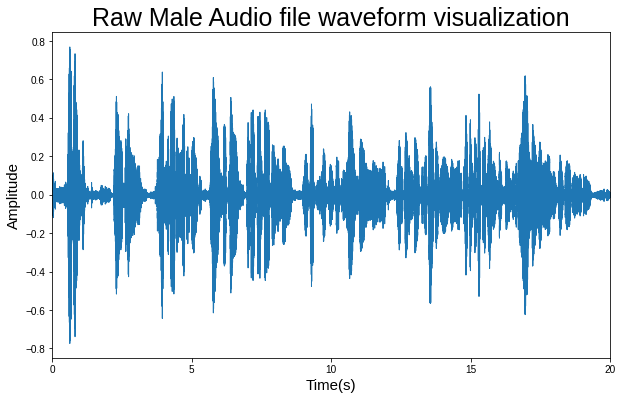

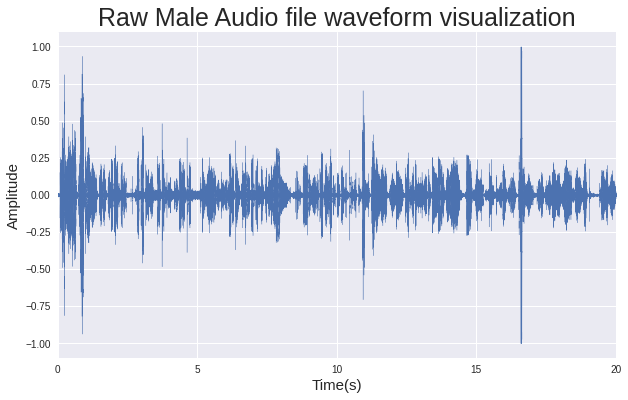

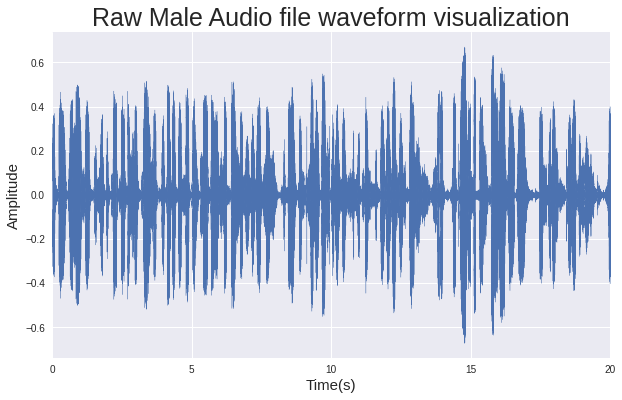

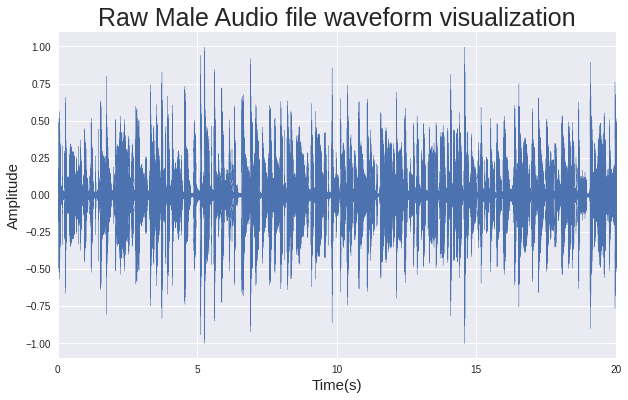

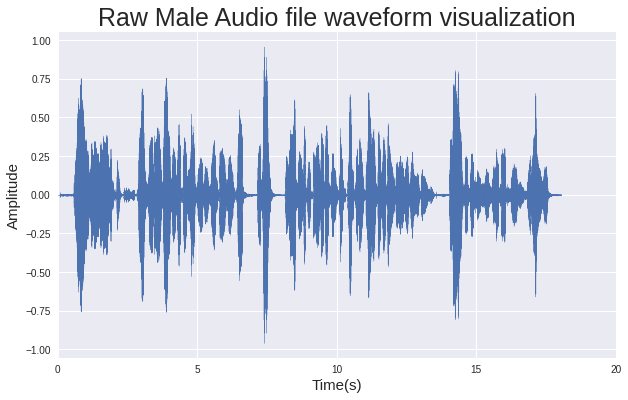

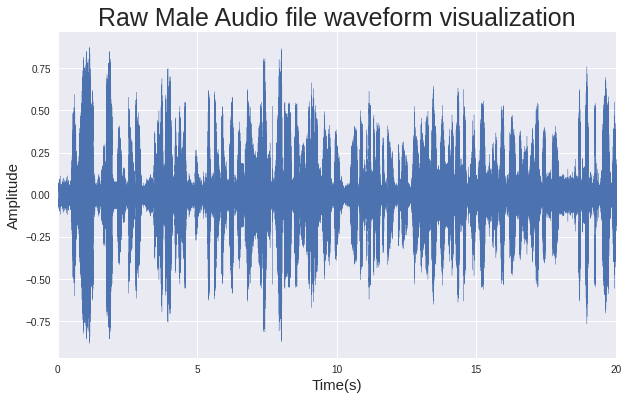

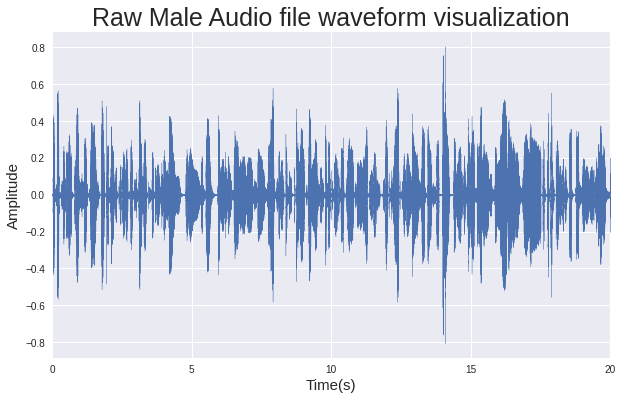

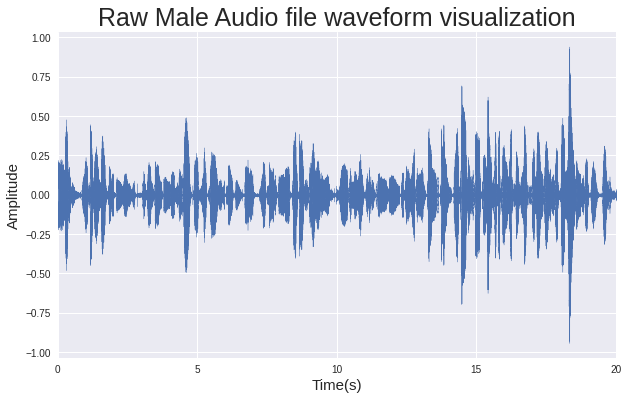

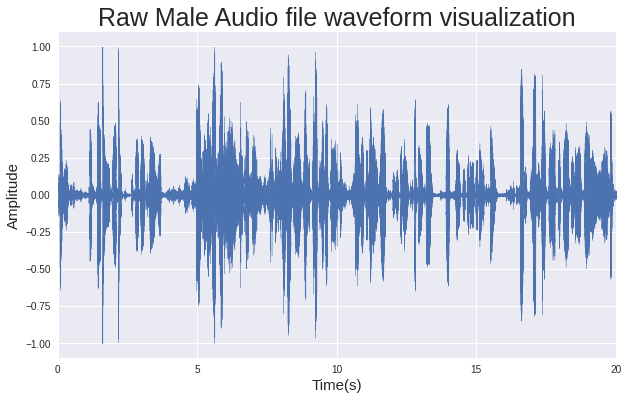

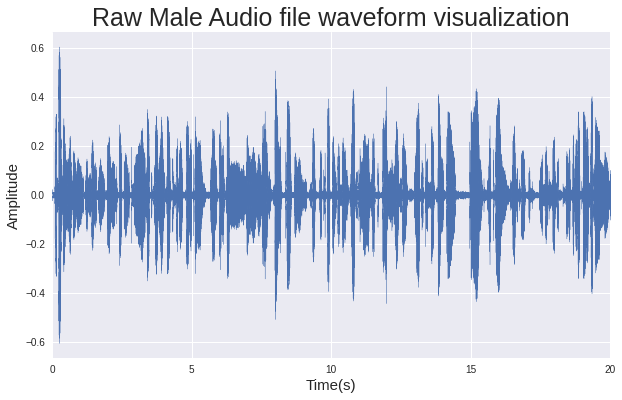

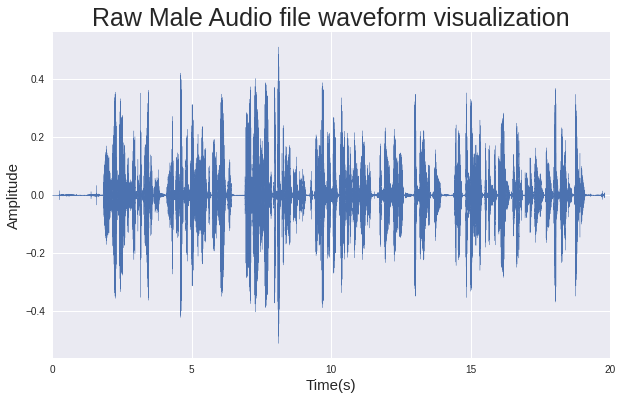

In [8]:

for x_male in digitalized_audios_male:
  plt.figure(figsize=(10, 6))
  librosa.display.waveplot(x_male, sr=sr_male)
  plt.xlabel('Time(s)', fontsize = 15)
  plt.xlim(0,20)  #setting limit for Time axis
  plt.ylabel('Amplitude', fontsize = 15)
  plt.title('Raw Male Audio file waveform visualization', fontsize = 25)
  style.use('seaborn')
plt.show()


##For Females

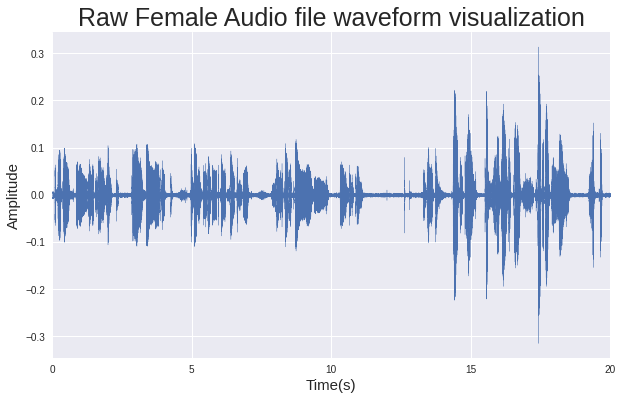

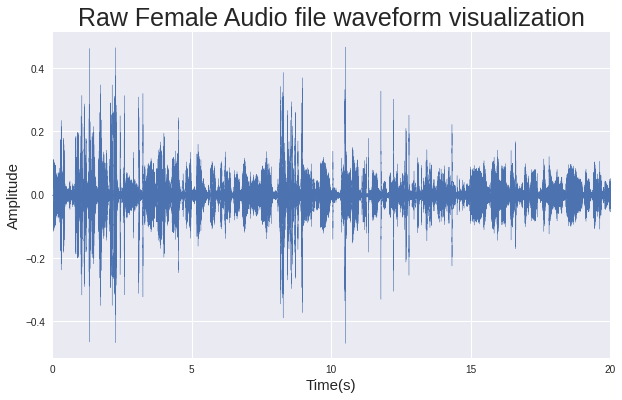

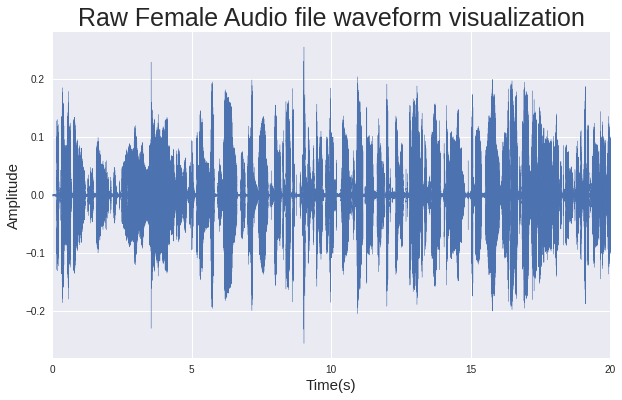

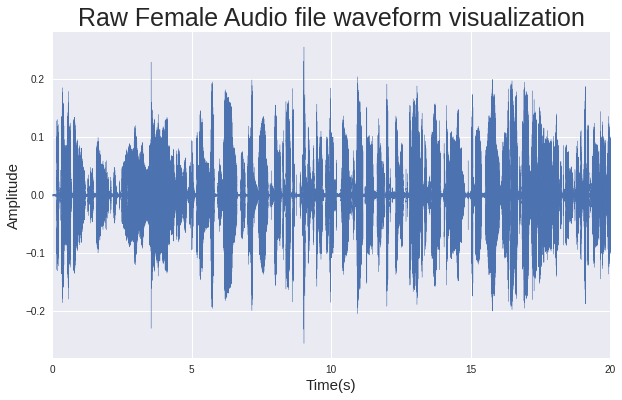

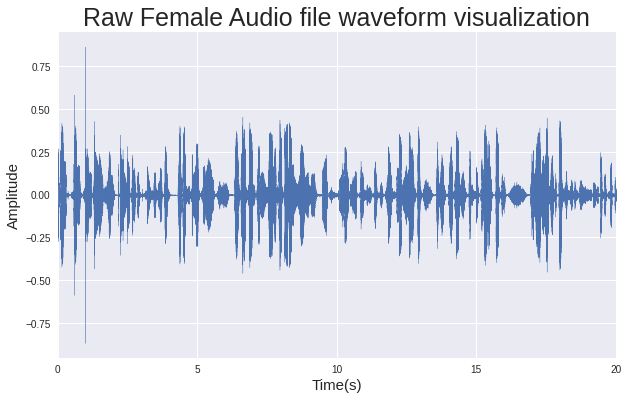

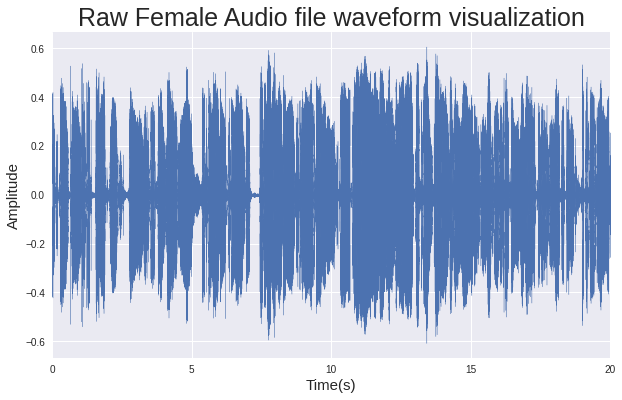

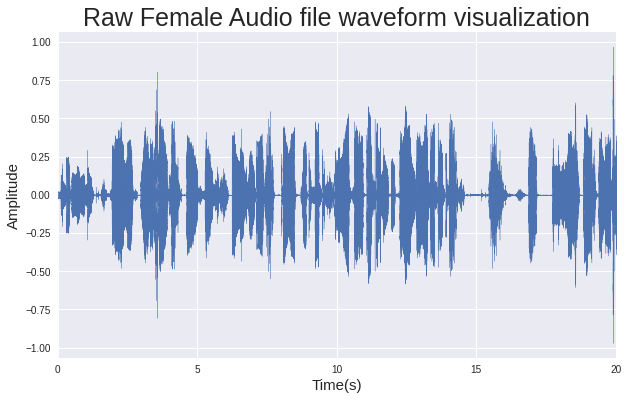

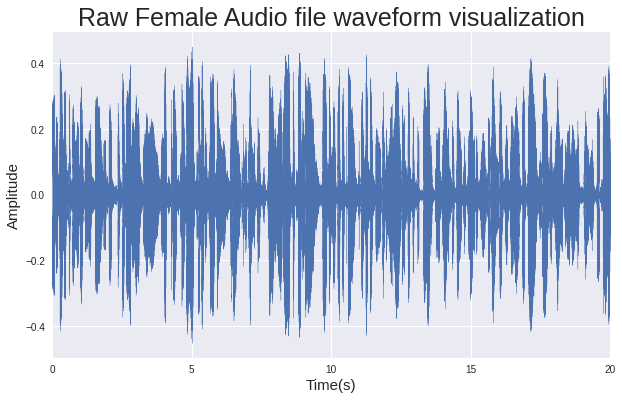

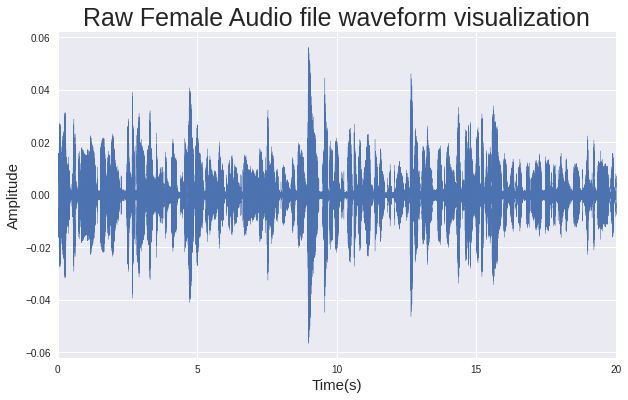

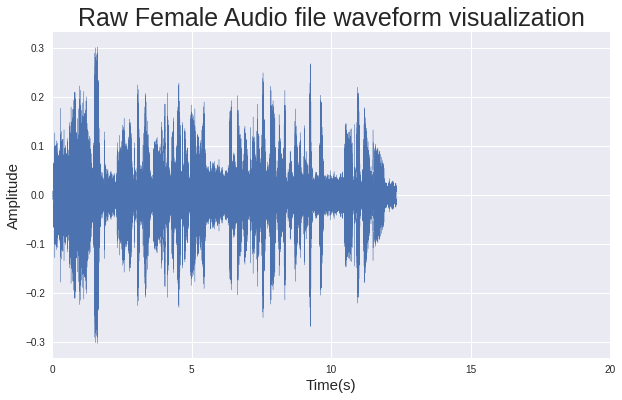

In [9]:
for x_female in female_digitalized_audios:
  plt.figure(figsize=(10, 6))
  librosa.display.waveplot(x_female, sr=sr_female)
  plt.xlabel('Time(s)', fontsize = 15)
  plt.xlim(0,20)  #setting limit for Time axis
  plt.ylabel('Amplitude', fontsize = 15)
  plt.title('Raw Female Audio file waveform visualization', fontsize = 25)
  style.use('seaborn')
plt.show()

# WINDOWING FUNCTION -  Using STFT

Spectrograph - Audio signal

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

convert spectrogram into logarithmic

# Audio Signal Pre-processing

# Normalization

In [ ]:
#min = minimum value for each row of the vector signal
#max = maximum value for each row of the vector signal
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(normalize(x), color='r')

In [ ]:
print("Computing FFT.. ")
freq_data = fft(x)
freq_data = freq_data
plt.plot(freq_data[:len(freq_data) // 2])
plt.title("original_freq_domain - Frequency domain")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
# plt.savefig("original_freq_domain.png", bbox_inches='tight')
plt.show()

In [ ]:
freq_data

In [ ]:
# NOW REMOVE NOISE ==============================
freq_data[20000:] = 0
plt.plot(freq_data[:len(freq_data) // 2])
plt.title("Filtered Frequency domain")
plt.ylabel("Amplitude")
plt.xlabel("Frequency")
plt.savefig("filtered_freq_domain.png", bbox_inches='tight')
plt.show()

In [ ]:
print("Computing Inverse FT.. ")
new_data = ifft(freq_data)
new_data = new_data.astype('int16')
print("New data:", new_data)
plt.plot(new_data)
plt.title("IFT Time domain")
plt.ylabel("Amplitude")
plt.xlabel("samples")
plt.savefig("ifft_time_domain.png", bbox_inches='tight')
plt.show()
print(len(new_data))
wavfile.write("denoise24.wav", new_data)

In [ ]:
ipd.Audio('denoise.wav')

# FEATURE EXTRACTION